**Linear Regrssion on US Housing Price**

Introduction
In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

**Dataset**

The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.
'Avg. Area House Age': Avg Age of Houses in same city
'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
'Area Population': Population of city house is located in
'Price': Price that the house sold at
'Address': Address for the house
Goal

In this case, we are going to predict the price of the house using the other given columns But the question is in what way does Price depend on the other measures(columns).

Price is the Dependent Variable and other columns are Independent Variable

**Import packages and dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Importing USA Housing.csv
df = pd.read_csv('/content/drive/MyDrive/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.459,5.683,7.009,4.090,23086.801,1059033.558,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642,6.003,6.731,3.090,40173.072,1505890.915,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067,5.866,8.513,5.130,36882.159,1058987.988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240,7.188,5.587,3.260,34310.243,1260616.807,USS Barnett\nFPO AP 44820
4,59982.197,5.041,7.839,4.230,26354.109,630943.489,USNS Raymond\nFPO AE 09386


**EDA**

In [4]:

df.shape

(5000, 7)

Check basic info on the data set
'info()' method to check the data types and number

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


There are no null values in the given dataset

**'describe()' method to get the statistical summary of the various features of the data set**

In [6]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,68583.109,5.977,6.988,3.981,36163.516,1232072.654
std,10657.991,0.991,1.006,1.234,9925.650,353117.627
min,17796.631,2.644,3.236,2.000,172.611,15938.658
10%,55047.634,4.698,5.682,2.310,23502.845,772031.775
25%,61480.562,5.322,6.299,3.140,29403.929,997577.135
50%,68804.286,5.970,7.003,4.050,36199.407,1232669.378
75%,75783.339,6.651,7.666,4.490,42861.291,1471210.204
90%,82081.188,7.244,8.274,6.100,48813.619,1684620.954
max,107701.748,9.519,10.760,6.500,69621.713,2469065.594


In [7]:
#range -  avg income -  15k - 110k
#         avg age  - 2 - 10
#         avg rooms - 3 - 11
#         avg beddrooms - 2 - 7
#         pop - 100 - 70k
#         price - 15k - 2.5mill

**'columns' method to get the names of the columns (features)**

In [8]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

**Data Preparation**

Since, there are no null values in the datset , so there is no need of deleting or replacing the data.
There is no necessity of having Address column/feature, so let's drop it.

In [9]:
# Dropping Address Column
df.drop(['Address'],axis=1,inplace=True)

In [10]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.459,5.683,7.009,4.090,23086.801,1059033.558
1,79248.642,6.003,6.731,3.090,40173.072,1505890.915
2,61287.067,5.866,8.513,5.130,36882.159,1058987.988
3,63345.240,7.188,5.587,3.260,34310.243,1260616.807
4,59982.197,5.041,7.839,4.230,26354.109,630943.489


**`Data Visualization`**


Here we are actually checking the relationships between each independent variable and the dependent variable using scatterplots and correlations.

Pairplots using seaborn

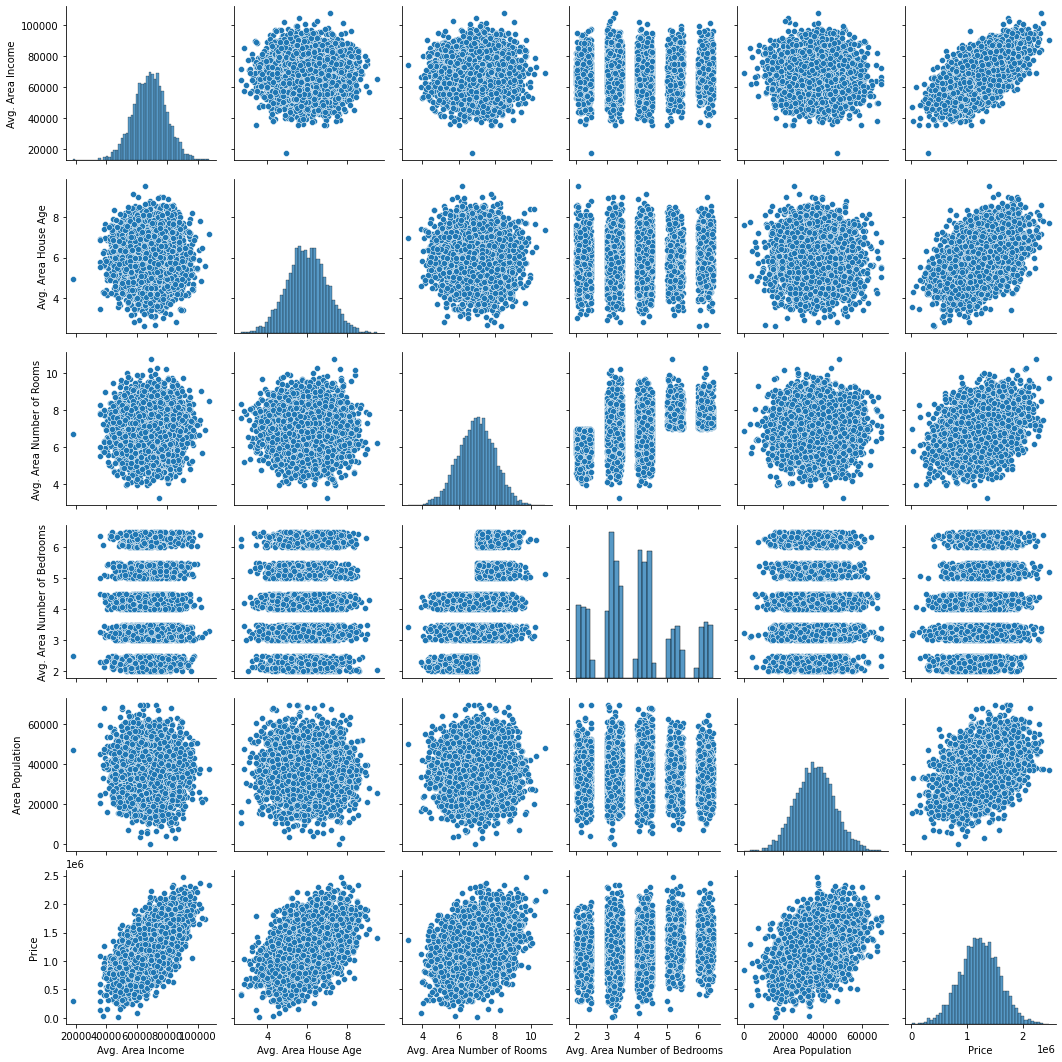

In [11]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(df, kind ="scatter")

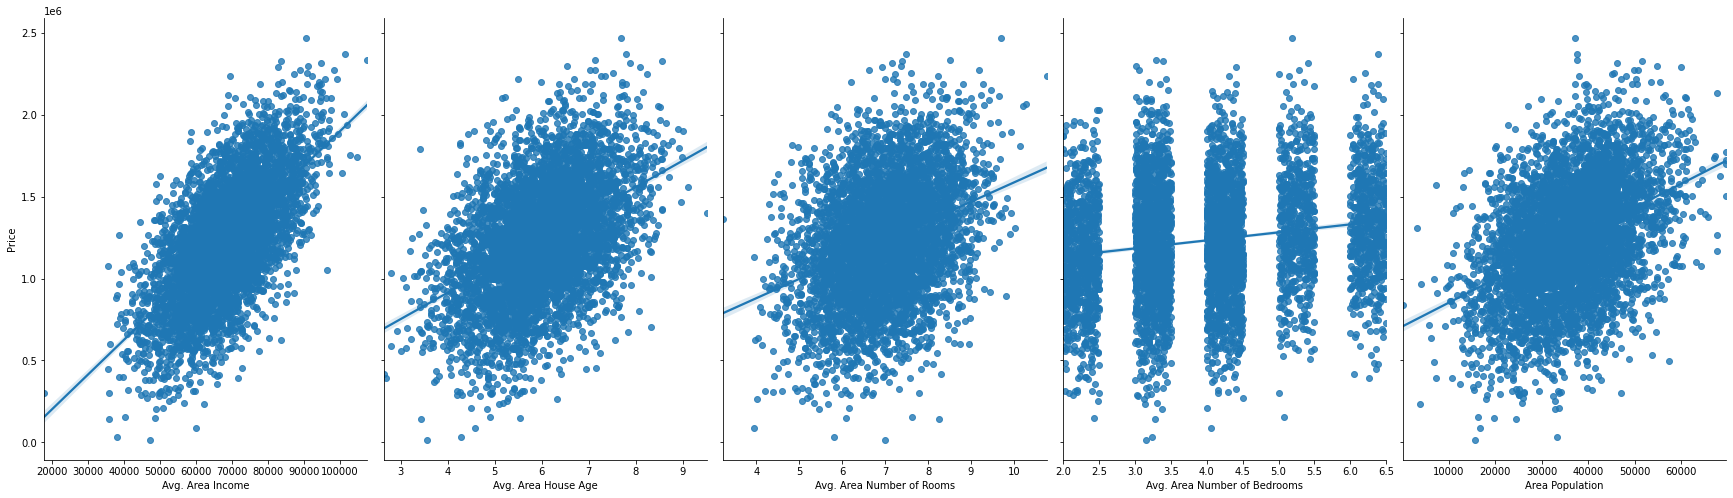

In [12]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'], y_vars='Price',height=7, aspect=0.7, kind='reg')

Independent Variable vs Dependant variable

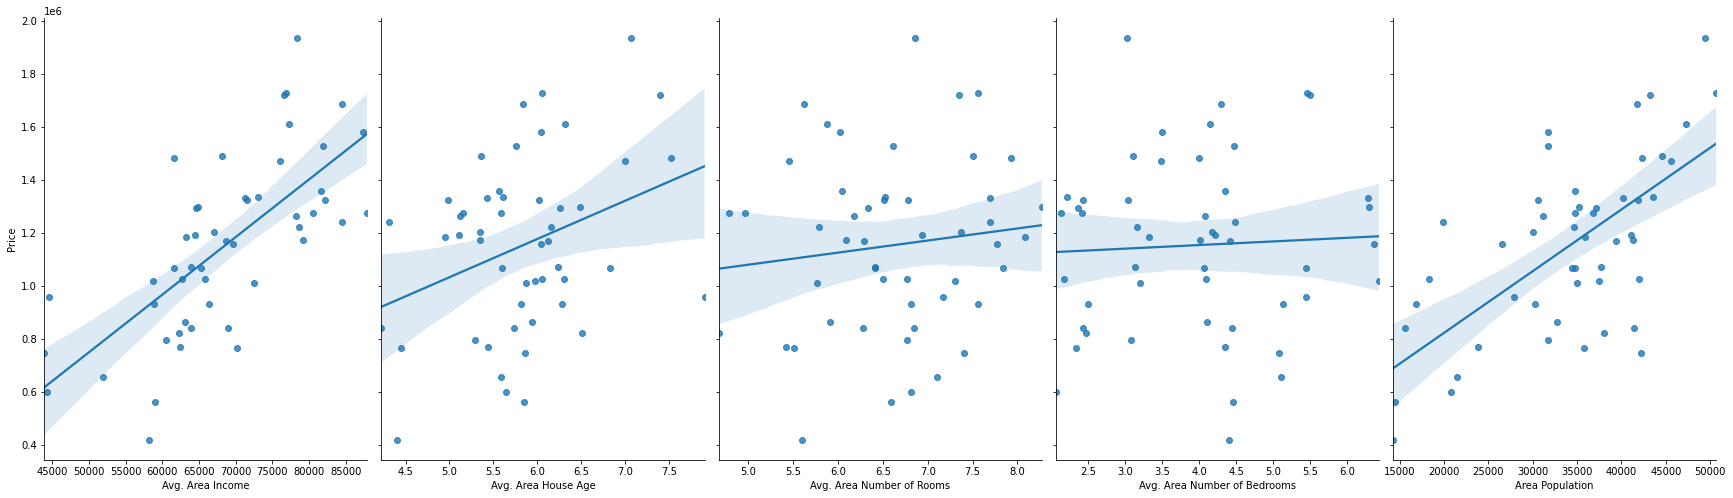

In [13]:
#to avoid overploting , lets draw a random sample of 50 datapoints from each column
sample_df = df.sample(50)
sns.pairplot(sample_df, x_vars=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'], y_vars='Price',height=7, aspect=0.7, kind='reg')

DV vs IV


Avg. Area Income is highly corelated with Price

Avg. Area House Age is moderately corelated with Price

Avg. Area Number of Rooms is slightly corelated with Price

Avg. Area Number of Bedrooms is not very much corelated with Price

Area Population is also slightly corelated


IV vs IV
Checking for Multicolinearity

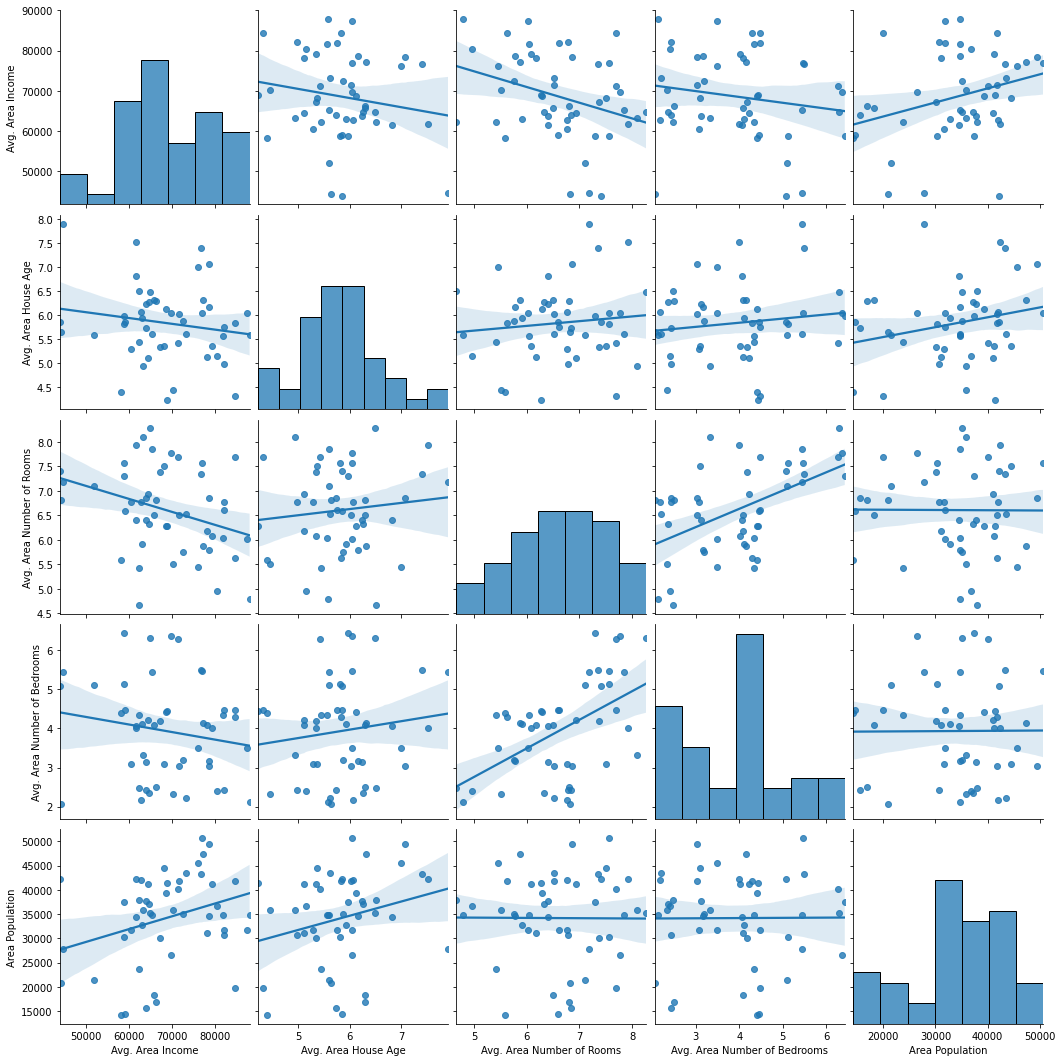

In [14]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(sample_df, x_vars=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'],
             y_vars= ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'],height=3, kind='reg')

Avg. Area Number of Rooms and Avg. Area Number of Bedrooms are seem to be moderately corelated. This is the case of Multicollinearity. Including both of those in the reression can cause some serious problems because the regression,the computer when it does it, is not really sure what coefficients to assign to those two variables if they are so similar. e should not use them in regression as the seem to be redundant.

**Correlation matrix and heatmap**

In [15]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000,-0.002,-0.011,0.020,-0.016,0.640
Avg. Area House Age,-0.002,1.000,-0.009,0.006,-0.019,0.453
Avg. Area Number of Rooms,-0.011,-0.009,1.000,0.463,0.002,0.336
Avg. Area Number of Bedrooms,0.020,0.006,0.463,1.000,-0.022,0.171
Area Population,-0.016,-0.019,0.002,-0.022,1.000,0.409
Price,0.640,0.453,0.336,0.171,0.409,1.000


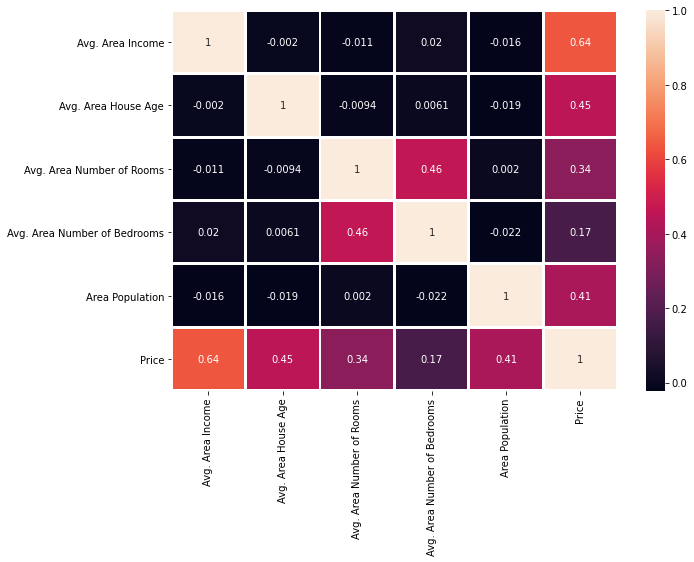

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


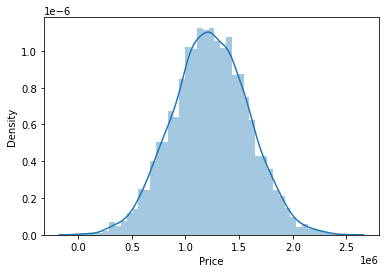

In [17]:
sns.distplot(df.Price)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


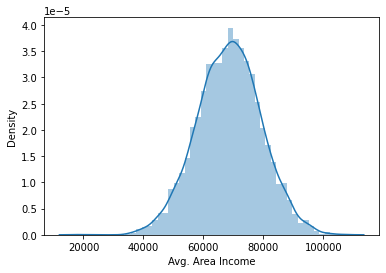

In [18]:
sns.distplot(df['Avg. Area Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


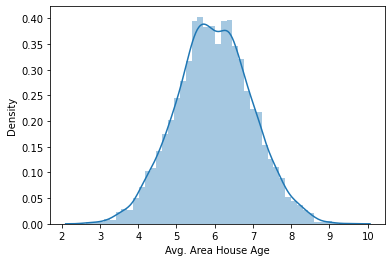

In [19]:
sns.distplot(df['Avg. Area House Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


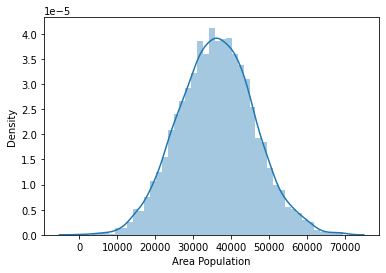

In [20]:
sns.distplot(df['Area Population'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


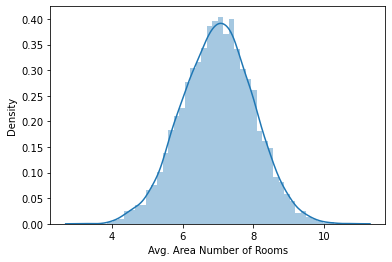

In [21]:
sns.distplot(df['Avg. Area Number of Rooms'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


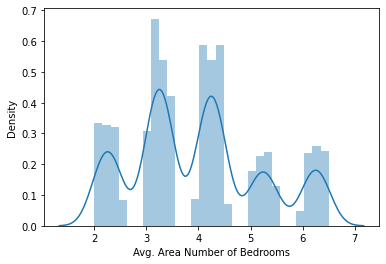

In [22]:
sns.distplot(df['Avg. Area Number of Bedrooms'])

**Fitting a multiple linear model using sklearn**

Here we ill create two model

Model 1 will include only 'Avg. Area Income','Avg. Area House Age' and 'Area Population' while Model 2 ill include all variales except Address

**Model 1**

**Feature Scaling**
When you’re working with a learning model, it is important to scale the features to a range which is centered around zero. This is done so that the variance of the features are in the same range. If a feature’s variance is orders of magnitude more than the variance of other features, that particular feature might dominate other features in the dataset, which is not something we want happening in our model.

Standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. In case of multivariate data, this is done feature-wise (in other words independently for each column of the data). Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

In [23]:
from sklearn import preprocessing
from sklearn import metrics

pre_process = preprocessing.StandardScaler()

In [24]:
# Putting feature variable to X
X = df[['Avg. Area Income','Avg. Area House Age','Area Population']]

# Putting response variable to y
y = df['Price']

In [25]:
X.head()

,Avg. Area Income,Avg. Area House Age,Area Population
0,79545.459,5.683,23086.801
1,79248.642,6.003,40173.072
2,61287.067,5.866,36882.159
3,63345.240,7.188,34310.243
4,59982.197,5.041,26354.109


In [ ]:
X = pd.DataFrame(pre_process.fit_transform(X))

In [26]:
X.head()

,Avg. Area Income,Avg. Area House Age,Area Population
0,79545.459,5.683,23086.801
1,79248.642,6.003,40173.072
2,61287.067,5.866,36882.159
3,63345.240,7.188,34310.243
4,59982.197,5.041,26354.109


In [27]:
X.describe()

,Avg. Area Income,Avg. Area House Age,Area Population
count,5000.000,5000.000,5000.000
mean,68583.109,5.977,36163.516
std,10657.991,0.991,9925.650
min,17796.631,2.644,172.611
25%,61480.562,5.322,29403.929
50%,68804.286,5.970,36199.407
75%,75783.339,6.651,42861.291
max,107701.748,9.519,69621.713


In [28]:
y.head()

0   1059033.558
1   1505890.915
2   1058987.988
3   1260616.807
4    630943.489
Name: Price, dtype: float64

**Test-train split**

Import train_test_split function from scikit-learn

In [29]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=2)

Check the size and shape of train/test splits (it should be in the ratio as per test_size parameter above)

In [30]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 3)
Test feature set size: (1500, 3)
Training variable set size: (3500,)
Test variable set size: (1500,)


Model fit and training

Import linear regression model estimator from scikit-learn and instantiate 

In [31]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

# fit the model to the training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Check the intercept and coefficients and put them in a DataFrame**

In [32]:
# print the intercept
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -1763968.5110842157


In [33]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [2.14408611e+01 1.63346042e+05 1.51964862e+01]


In [34]:
# Let's see the coefficient
cdf = pd.DataFrame(data=lm.coef_, columns=["Coefficients"], index = ['Avg. Area Income','Avg. Area House Age','Area Population'])
cdf

,Coefficients
Avg. Area Income,21.441
Avg. Area House Age,163346.042
Area Population,15.196


Prediction, error estimate, and regression evaluation matrices

Prediction using the lm mode

In [35]:
y_pred = lm.predict(X_test)
print ("Type of the predicted object:", type(y_pred))
print ("Size of the predicted object:", y_pred.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


**Regression evaluation metrice**s

In [36]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error (MAE): 125744.2890313141
Mean square error (MSE): 25152596152.69346
Root mean square error (RMSE): 158595.70029699247


**R-square value**

In [37]:
r_squared = round(metrics.r2_score(y_test,y_pred),3)
print("R-squared value of predictions:",r_squared)

R-squared value of predictions: 0.795


**Variance inflation factor**

Variance inflation factor (VIF) for an explanatory variable is given 1/(1-R^2). VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. The higher the value of VIF for ith regressor, the more it is highly correlated to other variables

In [38]:
vif_1 = (1/1-r_squared)
print("Variance inflation factor for Model 1",vif_1)

Variance inflation factor for Model 1 0.20499999999999996


**Adjusted R-square value**

In [39]:
adjusted_r_squared =round( 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1),3)
print("Adjusted R-squared value of predictions:",adjusted_r_squared)

Adjusted R-squared value of predictions: 0.795


**The Above are the results of Model 1 where wwe ignored to columns. Now lets train and evaluate on Model 2 using all variables.**

**Model 2**

**Feature Scaling**

In [55]:
# Putting feature variable to X
X = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]

# Putting response variable to y
y = df['Price']

In [56]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.459,5.683,7.009,4.090,23086.801
1,79248.642,6.003,6.731,3.090,40173.072
2,61287.067,5.866,8.513,5.130,36882.159
3,63345.240,7.188,5.587,3.260,34310.243
4,59982.197,5.041,7.839,4.230,26354.109


In [57]:
X = pd.DataFrame(pre_process.fit_transform(X))

In [63]:
X.head()

,0,1,2,3,4
0,1.029,-0.297,0.021,0.088,-1.318
1,1.001,0.026,-0.256,-0.722,0.404
2,-0.685,-0.112,1.516,0.931,0.072
3,-0.491,1.222,-1.393,-0.585,-0.187
4,-0.807,-0.945,0.847,0.202,-0.988


In [64]:
X.describe()

,0,1,2,3,4
count,5000.000,5000.000,5000.000,5000.000,5000.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000
min,-4.766,-3.362,-3.730,-1.606,-3.626
25%,-0.666,-0.661,-0.685,-0.682,-0.681
50%,0.021,-0.007,0.015,0.056,0.004
75%,0.676,0.679,0.674,0.412,0.675
max,3.671,3.573,3.750,2.041,3.371


**Test-train split**

**Import train_test_split function from scikit-learn **

In [65]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=2)

Check the size and shape of train/test splits (it should be in the ratio as per test_size parameter above)

In [66]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 5)
Test feature set size: (1500, 5)
Training variable set size: (3500,)
Test variable set size: (1500,)


**Model fit and training**

**Import linear regression model estimator from scikit-learn and instantiate** 

In [67]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# fit the model to the training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Check the intercept and coefficients and put them in a DataFrame**

In [68]:
# print the intercept
print("The intercept term of the linear model:", lm.intercept_)

print("The coefficients of the linear model:", lm.coef_)

The intercept term of the linear model: 1231006.3190642651
The coefficients of the linear model: [229275.2240318  163592.48713986 120113.25335113   3015.84757165
 150556.34029566]


In [69]:
# Let's see the coefficient
cdf = pd.DataFrame(data=lm.coef_, columns=["Coefficients"], index = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'])
cdf

,Coefficients
Avg. Area Income,229275.224
Avg. Area House Age,163592.487
Avg. Area Number of Rooms,120113.253
Avg. Area Number of Bedrooms,3015.848
Area Population,150556.340


**Prediction, error estimate, and regression evaluation matrices**

**Prediction using the lm model **

In [70]:
y_pred = lm.predict(X_test)
print ("Type of the predicted object:", type(y_pred))
print ("Size of the predicted object:", y_pred.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


**Regression evaluation metrices**

In [71]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error (MAE): 79912.70946052397
Mean square error (MSE): 9831074697.740437
Root mean square error (RMSE): 99151.776069521


R-square value

In [72]:
r_squared = round(metrics.r2_score(y_test,y_pred),3)
print("R-squared value of predictions:",r_squared)

R-squared value of predictions: 0.92


Adjusted R-square value

In [74]:
adjusted_r_squared =round( 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1),3)
print("Adjusted R-squared value of predictions:",adjusted_r_squared)

Adjusted R-squared value of predictions: 0.92


Variance inflation factor

In [75]:
vif_2 = (1/1-r_squared)
print("Variance inflation factor for Model 2:",vif_2)

Variance inflation factor for Model 2: 0.07999999999999996
